In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [222]:
data = pd.read_csv('C:/Users/zapro/OneDrive/Desktop/2_test_data_regno/test_data_regno.csv', sep=';')
data.head()

,id,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores
0,1,844,00:00:00,У991КВ799,У991КВ799,У991КВ799,0,"[""У"", ""9"", ""9"", ""1"", ""К"", ""В"", ""7"", ""9"", ""9""]","[0.9999366998672485, 0.9999223947525024, 0.999...","[0.000000034831597162110484, 0.000000034835451..."
1,2,2516,00:00:00,О019УК177,О019УК177,О019УК177,0,"[""О"", ""0"", ""1"", ""9"", ""У"", ""К"", ""1"", ""7"", ""7""]","[0.9998993873596191, 0.999862790107727, 0.9999...","[0.0000000068477667980459955, 0.00000000683332..."
2,3,2476,00:00:00,Е175АК150,Е175АК150,Е175АК150,0,"[""Е"", ""1"", ""7"", ""5"", ""А"", ""К"", ""1"", ""5"", ""0""]","[0.9997256398200989, 0.9999269247055054, 0.999...","[0.000000002039653557162069, 0.000000002043387..."
3,4,1251,00:00:01,Т359ОН799,Т359ОН799,Т359ОН799,0,"[""Т"", ""3"", ""5"", ""9"", ""О"", ""Н"", ""7"", ""9"", ""9""]","[0.9998781681060791, 0.9998764991760254, 0.999...","[0.00000002880540606042814, 0.0000000289985120..."
4,5,2516,00:00:01,В521СУ750,В521СУ750,В521СУ750,0,"[""В"", ""5"", ""2"", ""1"", ""С"", ""У"", ""7"", ""5"", ""0""]","[0.999920129776001, 0.9999333620071411, 0.9999...","[0.000000009300508807541519, 0.000000009201486..."


<AxesSubplot:>

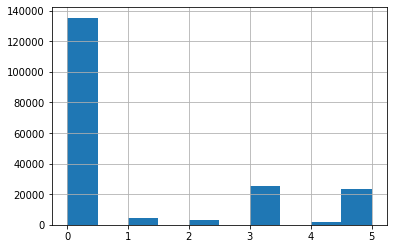

In [5]:
data.result_code.hist()

In [ ]:
data.length_scores.values[0]

'[0.000000034831597162110484, 0.00000003483545185645198, 0.00000003468561260433489, 0.00000003473692089528413, 0.000000034993011155393106, 0.000000034923196778891, 0.00000003507172152694693, 0.0000014320634136311128, 0.00006696282798657194, 0.9999313354492188, 0.00000003498553624581291]'

In [6]:
from ast import literal_eval
data.length_scores = data.length_scores.apply(lambda x: literal_eval(x))

In [7]:
data.symbols = data.symbols.apply(lambda x: literal_eval(x))
data.symbol_scores = data.symbol_scores.apply(lambda x: literal_eval(x))

In [8]:
data.values[0]

array([1, 844, '00:00:00', 'У991КВ799', 'У991КВ799', 'У991КВ799', 0,
       list(['У', '9', '9', '1', 'К', 'В', '7', '9', '9']),
       list([0.9999366998672485, 0.9999223947525024, 0.9998831748962402, 0.999906063079834, 0.9999197721481323, 0.9998780488967896, 0.9997326731681824, 0.9995266199111938, 0.9990807771682739]),
       list([3.4831597162110484e-08, 3.483545185645198e-08, 3.468561260433489e-08, 3.473692089528413e-08, 3.4993011155393106e-08, 3.4923196778891e-08, 3.507172152694693e-08, 1.4320634136311128e-06, 6.696282798657194e-05, 0.9999313354492188, 3.498553624581291e-08])],
      dtype=object)

Подключим алгоритм, основанный на алгоритме Левенштейна для поиска численного отличия строк.

In [9]:
!pip install strsimpy

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [10]:
from strsimpy.metric_lcs import MetricLCS

metric_lcs = MetricLCS()
metric_lcs.distance('ABDEF', 'ABDIF')

0.19999999999999996

In [11]:
data['score_LCS'] = [metric_lcs.distance(x[0], x[1]) for x in data[['regno', 'regno_ai']].values]

In [12]:
data['score_LCS'] = data['score_LCS'].isin([0])

In [13]:
data['score_LCS'] = data['score_LCS'].astype(int)

<AxesSubplot:>

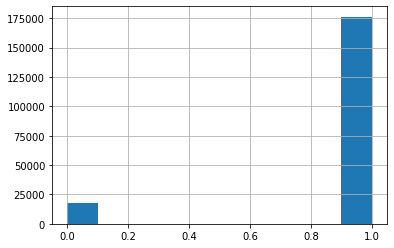

In [14]:
data['score_LCS'].hist()

Если score_LCS = 1, то итоговый номер ничем не отличается от номера, который получили от нового алгоритма.

Видим сильный дисбаланс классов

In [16]:
data.head()

,id,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores,score_LCS
0,1,844,00:00:00,У991КВ799,У991КВ799,У991КВ799,0,"[У, 9, 9, 1, К, В, 7, 9, 9]","[0.9999366998672485, 0.9999223947525024, 0.999...","[3.4831597162110484e-08, 3.483545185645198e-08...",1
1,2,2516,00:00:00,О019УК177,О019УК177,О019УК177,0,"[О, 0, 1, 9, У, К, 1, 7, 7]","[0.9998993873596191, 0.999862790107727, 0.9999...","[6.8477667980459955e-09, 6.833323240584832e-09...",1
2,3,2476,00:00:00,Е175АК150,Е175АК150,Е175АК150,0,"[Е, 1, 7, 5, А, К, 1, 5, 0]","[0.9997256398200989, 0.9999269247055054, 0.999...","[2.039653557162069e-09, 2.043387681283093e-09,...",1
3,4,1251,00:00:01,Т359ОН799,Т359ОН799,Т359ОН799,0,"[Т, 3, 5, 9, О, Н, 7, 9, 9]","[0.9998781681060791, 0.9998764991760254, 0.999...","[2.880540606042814e-08, 2.8998512036082502e-08...",1
4,5,2516,00:00:01,В521СУ750,В521СУ750,В521СУ750,0,"[В, 5, 2, 1, С, У, 7, 5, 0]","[0.999920129776001, 0.9999333620071411, 0.9999...","[9.300508807541519e-09, 9.201486683707572e-09,...",1


In [17]:
Y = []
l1 = []
l2 = []
for row in data[['symbol_scores', 'length_scores', 'score_LCS']].values:
    l1.append(min(row[0]))
    l2.append(max(row[1]))
    Y.append(row[2])

l1 - минимальный скор по всем символам строки
l2 - максимальный скор длины строки

In [18]:
r = pd.DataFrame({'l1': l1, 'l2': l2, 'y': Y})
r.head()

,l1,l2,y
0,0.999081,0.999931,1
1,0.999863,0.999990,1
2,0.999726,0.999999,1
3,0.999265,0.999982,1
4,0.999577,0.999992,1


<AxesSubplot:xlabel='y', ylabel='l2'>

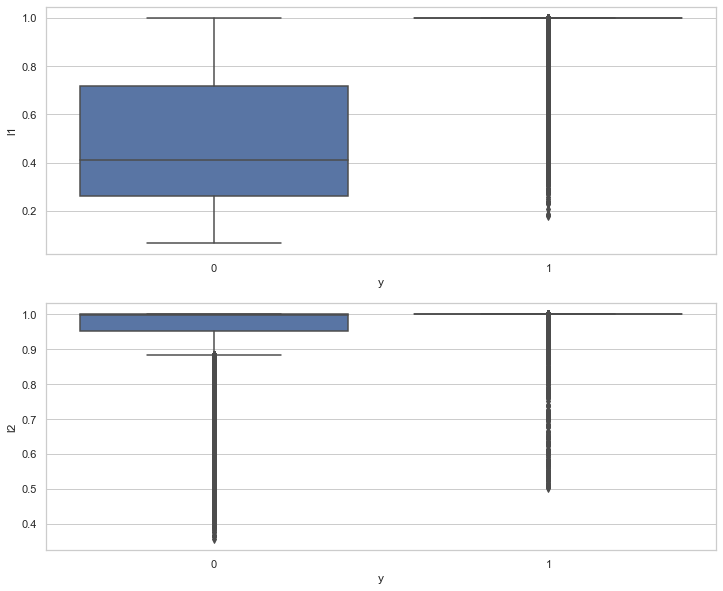

In [19]:
import seaborn as sns

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(nrows=2, figsize=(12,10))
sns.boxplot(x="y", y="l1", data=r, ax=ax[0])
sns.boxplot(x="y", y="l2", data=r, ax=ax[1])

Как мы можем видеть, нам достаточно вероятности ошибиться в 1 символе, чтобы требовать проверки оператором.

In [20]:
X = r[['l1', 'l2']]
Y = r.y
X.shape

(194214, 2)

In [22]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [23]:
import statsmodels.api as sm

logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.106534
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.653     
Dependent Variable: y                AIC:              41384.6675
Date:               2021-07-12 23:53 BIC:              41405.0209
No. Observations:   194214           Log-Likelihood:   -20690.   
Df Model:           1                LL-Null:          -59640.   
Df Residuals:       194212           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
       Coef.     Std.Err.      z       P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
l1     15.4995     0.1222   126.8727   0.0000    15.2601    15.7389
l2    -11.5913     0.1161   -99.8276   0.0000   -11.8188  

Видим, что p-value меньше 0.05, поэтому оставляем наши фичи.

Сбалансируем выборку.

In [25]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])

# Мы можем проверить числа наших данных
print("length of oversampled data is ",len(os_data_X))
print("Number of changing strings",len(os_data_y[os_data_y['y']==0]))
print("Number of no changing strings",len(os_data_y[os_data_y['y']==1]))
print("Proportion of changing string in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of no changing strings in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  246888
Number of changing strings 123444
Number of no changing strings 123444
Proportion of changing string in oversampled data is  0.5
Proportion of no changing strings in oversampled data is  0.5


In [28]:
X = os_data_X[['l1', 'l2']]
Y = os_data_y['y']

Обучим модель логистической регрессии

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


"Точность" классификатора логистической регрессии для тестового набора: 0,92.

In [31]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[31353  5627]
 [  453 36634]]


Матрица ошибок показывает, что у нас 67987 верных ответов и 6080 - неверных из чуть более 74000 примеров.

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91     36980
           1       0.87      0.99      0.92     37087

    accuracy                           0.92     74067
   macro avg       0.93      0.92      0.92     74067
weighted avg       0.93      0.92      0.92     74067



Можно видеть, что полнота в классе 0 низкая из-за большого количества ложно-отрицательных ответов, т.е. оператору мы будем давать на перепроверку хорошие результаты.

Во всяком случае F1 мера довольно высокая, что говорит о неплохом результате.

Если у объекта класс равен 1, то пересматривать оператору не нужно, т.к. новый алгоритм верно распознал номер с вероятностью 0,92.

ROC - кривая:

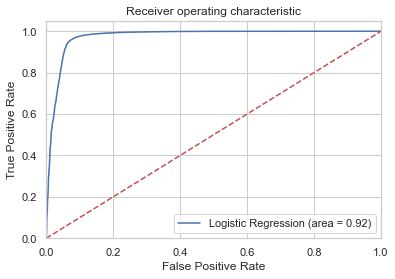

In [33]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Видим, что наша модель предказывает сильно лучше, чем случайная (красный пунктир).

In [34]:
max_x = []
for x in logreg.predict_proba(X_test):
    max_x.append(max(x))
min(max_x)

0.500008189943075

(array([  181.,   199.,   187.,   184.,   244.,   216.,   238.,   265.,
          236.,   306.,   396.,   365.,   488.,   799., 39532.,   177.,
          232.,   312.,   581., 28929.]),
 array([0.50000819, 0.52500778, 0.55000737, 0.57500696, 0.60000655,
        0.62500614, 0.65000573, 0.67500532, 0.70000491, 0.7250045 ,
        0.75000409, 0.77500369, 0.80000328, 0.82500287, 0.85000246,
        0.87500205, 0.90000164, 0.92500123, 0.95000082, 0.97500041,
        1.        ]),
 <BarContainer object of 20 artists>)

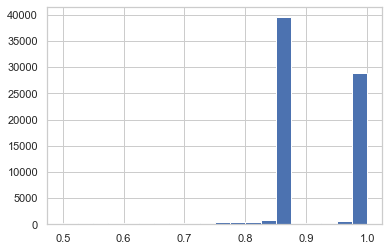

In [35]:
plt.hist(max_x, bins=20)

Найдём скор, от которого будем доверять моделе и не отправлять нарушение оператору.

c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

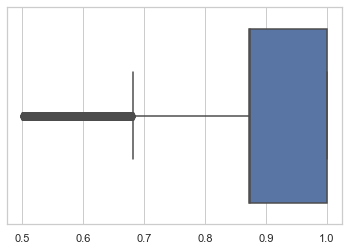

In [36]:
sns.boxplot(max_x)

In [37]:
max_x = pd.Series(max_x)

max_x.mode()[0], max_x.mean(), max_x.median()

(0.8729195917580436, 0.9138777092261062, 0.8731534674786432)

Будем считать, что мы доверяем модели, если даёт скор не меньше 0.85

In [39]:
max_x[max_x<0.85].count()/max_x.count()

0.058109549461973616

Тогда в среднем мы будем отдавать на перепроверку оператору около 6% нарушений.

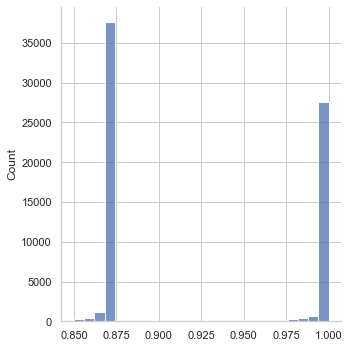

In [46]:
sns.displot(max_x[max_x>=0.85])

А точность нашей модели будет в районе 90-92% для результатов, которые не будут перепроверяться оператором.

Теперь стоит попробовать другой алгоритм классификации.

Попробуем XGBoost

In [47]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.05%


Точность классификатора xgb классификатора для тестового набора: 0,95.

In [51]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[34519  2461]
 [ 1209 35878]]


Как видим, эта модель реже ошибается.

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     36980
           1       0.94      0.97      0.95     37087

    accuracy                           0.95     74067
   macro avg       0.95      0.95      0.95     74067
weighted avg       0.95      0.95      0.95     74067



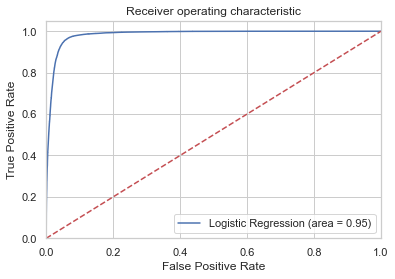

In [53]:
xgb_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Получается, эта модель лучше справляется с задачей!

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

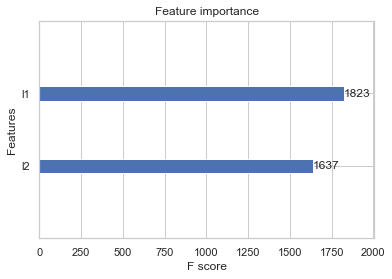

In [54]:
import xgboost as xgb

xgb.plot_importance(xgb_model)

Как видим, обе фичи влияют почти равнозначно на предикт.

min accuracy:  0.50000644


(array([  269.,   237.,   316.,   294.,   356.,   339.,   348.,   386.,
          388.,   411.,   658.,   724.,   889.,  1049.,  1318.,  2236.,
         3531.,  7477., 14144., 38697.]),
 array([0.50000644, 0.52500486, 0.55000323, 0.57500166, 0.6       ,
        0.62499845, 0.6499969 , 0.67499524, 0.69999367, 0.72499204,
        0.74999046, 0.7749889 , 0.79998726, 0.8249857 , 0.84998405,
        0.8749825 , 0.8999809 , 0.92497927, 0.9499777 , 0.97497606,
        0.9999745 ], dtype=float32),
 <BarContainer object of 20 artists>)

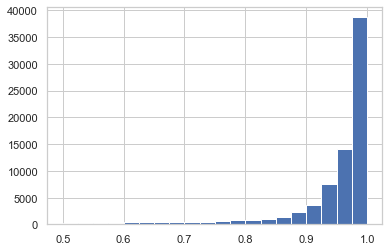

In [55]:
max_x = []
for x in xgb_model.predict_proba(X_test):
    max_x.append(max(x))
print("min accuracy: ",min(max_x))
plt.hist(max_x, bins=20)

c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

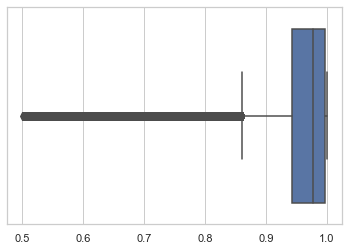

In [56]:
sns.boxplot(max_x)

In [57]:
max_x = pd.Series(max_x)

max_x.mode()[0], max_x.mean(), max_x.median()

(0.9999280571937561, 0.9480854900330029, 0.9773211479187012)

In [72]:
max_x.sort_values()[int(0.95*max_x.count()):]

15403    0.999916
53748    0.999916
9169     0.999916
17386    0.999916
27227    0.999916
           ...   
3830     0.999974
37537    0.999974
13177    0.999974
67819    0.999974
64597    0.999974
Length: 3704, dtype: float64

Если мы будем давать 5% на перепроверку, то точность нашей модели возрастает до 99.99% для данных, которые не отправляются на перепроверку. Полнота это модели равна 0.93-0.94, что очень хорошо, относительно обычной логистической регрессии.

Попробуем ещё одну модельку. Просто немного поиграем с параметрами.

In [195]:
xg_reg = xgb.XGBClassifier(
                objective = 'binary:logistic',
                learning_rate = 0.1,
                max_depth = 20, 
                alpha = 0.1, 
                n_estimators = 100,
                n_jobs=-1
                )
xg_reg.fit(X_train, y_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0.100000001, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [196]:
y_pred = xg_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.38%


Получилось немного улучшить качество модели засчёт регуляризации и увеличения глубины дерева.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

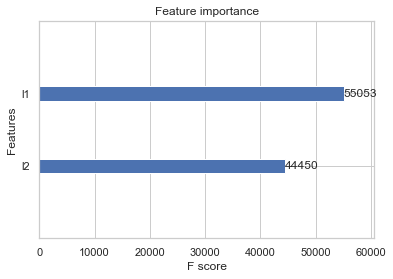

In [75]:
import xgboost as xgb

xgb.plot_importance(xg_reg)

Как видим, обе фичи влияют почти равнозначно на предикт.

In [76]:
max_x = []
for x in xg_reg.predict_proba(X_test):
    max_x.append(max(x))
min(max_x)

0.50017005

(array([  265.,   257.,   250.,   258.,   304.,   243.,   282.,   330.,
          370.,   413.,   463.,   593.,   650.,   928.,  1129.,  1503.,
         2382.,  4458., 10021., 48968.]),
 array([0.50017005, 0.5251581 , 0.5501461 , 0.57513416, 0.6001222 ,
        0.62511027, 0.6500983 , 0.6750863 , 0.7000744 , 0.72506243,
        0.7500504 , 0.7750385 , 0.80002654, 0.8250146 , 0.85000265,
        0.87499064, 0.8999787 , 0.92496675, 0.94995475, 0.9749428 ,
        0.99993086], dtype=float32),
 <BarContainer object of 20 artists>)

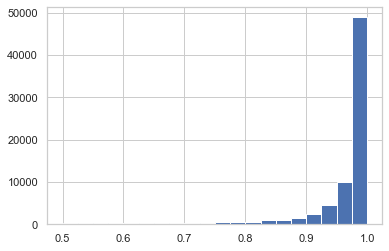

In [77]:
plt.hist(max_x, bins=20)

c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

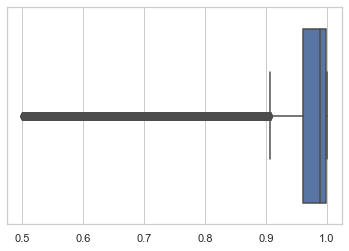

In [78]:
sns.boxplot(max_x)

In [79]:
max_x = pd.Series(max_x)

max_x.mode()[0], max_x.mean(), max_x.median()

(0.999926745891571, 0.9584719124473114, 0.9880914688110352)

In [80]:
max_x.sort_values()[int(0.95*max_x.count()):]

37309    0.999897
44824    0.999897
61333    0.999897
21518    0.999897
47542    0.999897
           ...   
54362    0.999931
24126    0.999931
60693    0.999931
4726     0.999931
28079    0.999931
Length: 3704, dtype: float64

Получили практически аналогичный результат.

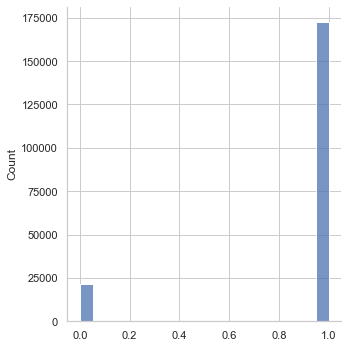

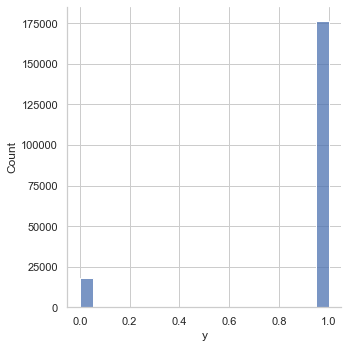

In [203]:
pred = xg_reg.predict(r[['l1','l2']])
sns.displot(pred)
sns.displot(r.y)

In [221]:
(pred[pred==0].size - r[r.y == 0].y.size)/r[r.y==0].y.size

0.2031573643844819

Получается, что с этой моделью можно предсказывать около 80% случаев неверного распознавания ГРЗ новым алгоритмом.

Попробуем ещё нейроночку, но интерпретировать результаты будет уже невозможно.

In [81]:
import tensorflow as tf
import keras
from tensorflow.keras import layers

In [104]:
X_train.shape, y_train.shape

((172821, 2), (172821,))

In [161]:
y_train_2 = y_train.values.reshape(-1,1)
y_test_2 = y_test.values.reshape(-1,1)
y_train_2.shape

(172821, 1)

In [171]:
model = keras.Sequential(
    [
        layers.Dense(1000, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(1, activation='sigmoid'),
    ]
)  
x = tf.ones((1, 2))
model(x)
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (1, 1000)                 3000      
_________________________________________________________________
dense_82 (Dense)             (1, 100)                  100100    
_________________________________________________________________
dense_83 (Dense)             (1, 1)                    101       
Total params: 103,201
Trainable params: 103,201
Non-trainable params: 0
_________________________________________________________________


In [172]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=opt, metrics='accuracy', loss='binary_crossentropy')

In [173]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(X_train, y_train_2, batch_size=128, validation_data=(X_test, y_test_2), epochs=10, verbose=1, callbacks=callback)

Epoch 1/10
1351/1351 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.8883 - val_loss: 0.2499 - val_accuracy: 0.9173
Epoch 2/10
1351/1351 [==============================] - 3s 2ms/step - loss: 0.2385 - accuracy: 0.9210 - val_loss: 0.3178 - val_accuracy: 0.9365
Epoch 3/10
1351/1351 [==============================] - 3s 2ms/step - loss: 0.2419 - accuracy: 0.9209 - val_loss: 0.2603 - val_accuracy: 0.9108
Epoch 4/10
1351/1351 [==============================] - 3s 2ms/step - loss: 0.2392 - accuracy: 0.9231 - val_loss: 0.2451 - val_accuracy: 0.9268


In [85]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<AxesSubplot:ylabel='accuracy'>

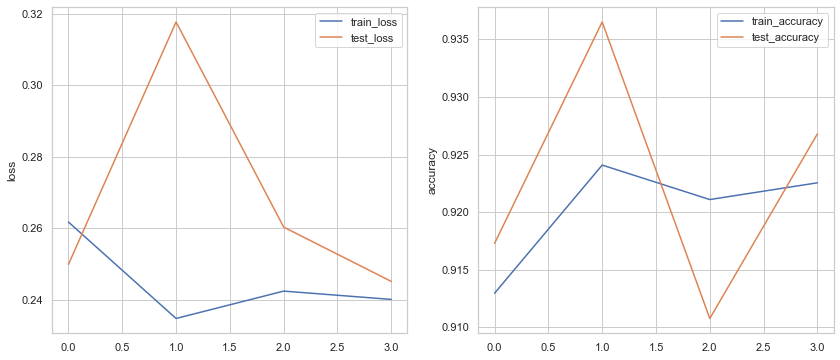

In [174]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))
sns.lineplot(x=list(range(4)), y='loss', data=history.history, ax=ax[0], legend='auto', label='train_loss')
sns.lineplot(x=list(range(4)), y='val_loss', data=history.history, ax=ax[0], legend='auto', label='test_loss')
sns.lineplot(x=list(range(4)), y='accuracy', data=history.history, ax=ax[1], legend='auto', label='train_accuracy')
sns.lineplot(x=list(range(4)), y='val_accuracy', data=history.history, ax=ax[1], legend='auto', label='test_accuracy')

Эта модель получилась явно хуже. Кроме того, её ещё и трудно интерпретировать. Не будем её брать.

Попробуем ещё случайный лес. Ансамбли в этой задачи неплохо должны справляться.

In [175]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(max_depth=20, random_state=0, n_estimators=100, n_jobs=-1)
forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=0)

In [176]:
y_pred = forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.09%


In [179]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[34406  2574]
 [ 1060 36027]]


In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     36980
           1       0.93      0.97      0.95     37087

    accuracy                           0.95     74067
   macro avg       0.95      0.95      0.95     74067
weighted avg       0.95      0.95      0.95     74067



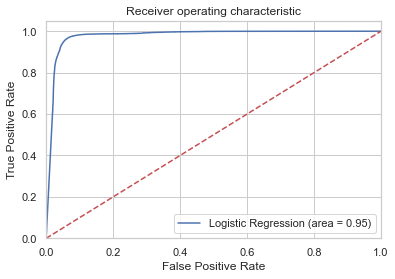

In [181]:
forest_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, forest_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % forest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Можно заметить, что ансамбли XGBoost дают схожее качество.

In [187]:
data[data['score_LCS'] == 0].id.count()/data.id.count()

0.09197586167835481

Примерно 9% всех нарушений при обработке новой моделью отличаются от итогового результата проверки.

In [193]:
data[(data['score_LCS'] == 0) & ((data.result_code == 1) | (data.result_code == 4))].id.count()/data[data['score_LCS'] == 0].id.count()

0.30151710239041596

In [194]:
data[(data['score_LCS'] == 0) & (data.result_code == 5)].id.count()/data[data['score_LCS'] == 0].id.count()

0.6253148967138779

Из этих 9% примерно 30% - изображения с плохим качеством или плохо видно ГРЗ. И в 62.5% случаях это иные причины не оформления нарушения.

Вывод:


Результаты (скор) нашего нового математического алгоритма можно проводить через ещё ансамбли деревьев, чтобы понять, какое нарушение следует пересмотреть оператору.
В таком случае мы сможем предсказывать около 80% случаев неверного распознавания ГРЗ новым алгоритмом с точностью 95%. Если мы дополнительно установим планку ансамблям в точности, когда им верим, то мы сможем получать предсказания более точные, но тогда оператору придётся больше перепроверять из-за планки, ведь нарушения, которые не прошли планку скора в ансамблях, идут сразу к оператору.